### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'


In [ ]:
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [ ]:
df.columns


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')

#1. Análisis de facturación



In [ ]:
# Creamos una columna nueva llamada "facturacion"
df['facturacion'] = df['Precio'] * df['Cantidad de cuotas']

# Agrupamos por tienda y sumamos la facturación total
facturacion_total = df.groupby('tienda')['facturacion'].sum().sort_values()

# Configuramos pandas para mostrar los números sin notación científica
pd.options.display.float_format = '{:,.0f}'.format

# Mostramos la facturación total
print(facturacion_total)


tienda
Tienda 4   3,098,827,200
Tienda 3   3,243,816,900
Tienda 2   3,337,189,200
Tienda 1   3,422,717,700
Name: facturacion, dtype: float64


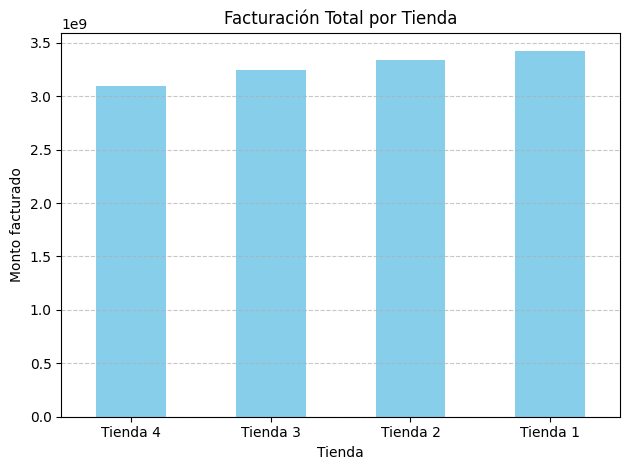

In [ ]:
import matplotlib.pyplot as plt

facturacion_total.plot(kind='bar', color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Monto facturado')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Con esto podemos ver que la tienda que mas factura es la 1 y la que menos es la tienda 4

# 2. Ventas por categoría

In [ ]:
# Contamos cuántas veces se vendió cada categoría en cada tienda
categorias_populares = df.groupby(['tienda', 'Categoría del Producto'])['Producto'].count()

# Lo transformamos para encontrar la más popular por tienda
categorias_populares = categorias_populares.reset_index()
categorias_populares = categorias_populares.sort_values(['tienda', 'Producto'], ascending=[True, False])

# Nos quedamos con la categoría más popular por tienda
categorias_top = categorias_populares.groupby('tienda').first()

print(categorias_top)


         Categoría del Producto  Producto
tienda                                   
Tienda 1                Muebles       465
Tienda 2                Muebles       442
Tienda 3                Muebles       499
Tienda 4                Muebles       480


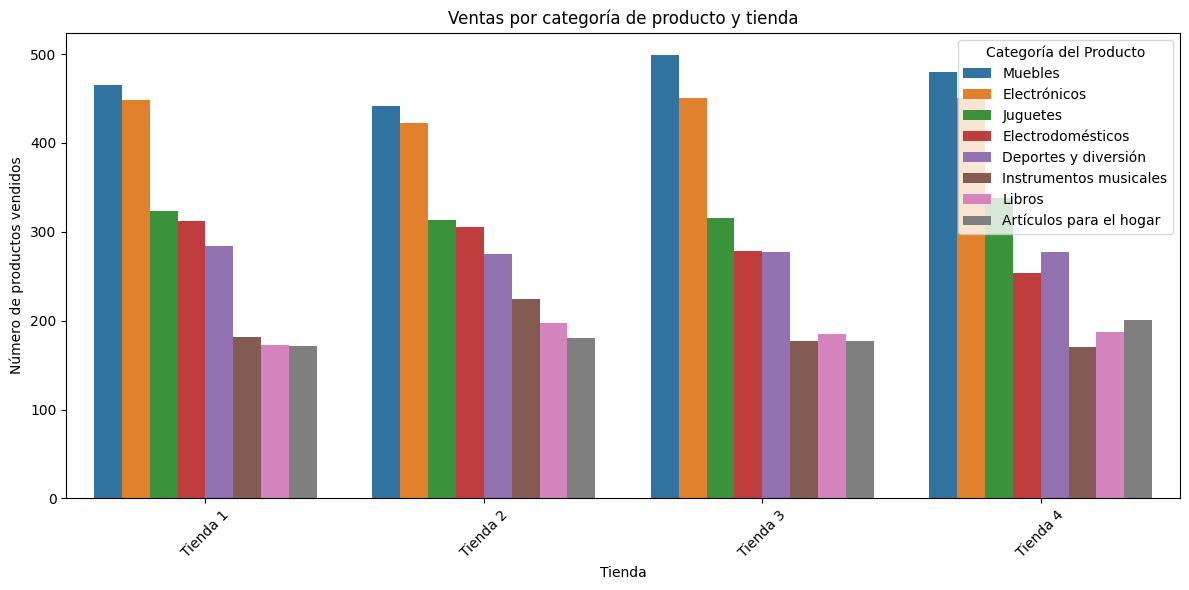

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contamos las ventas por categoría y tienda
ventas_por_categoria = df.groupby(['tienda', 'Categoría del Producto'])['Producto'].count().reset_index()

# Ordenamos por tienda y por número de ventas
ventas_por_categoria = ventas_por_categoria.sort_values(['tienda', 'Producto'], ascending=[True, False])

# Graficamos con barras no apiladas
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
sns.barplot(data=ventas_por_categoria, x='tienda', y='Producto', hue='Categoría del Producto')

# Añadimos etiquetas y título
plt.title('Ventas por categoría de producto y tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de productos vendidos')
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.tight_layout()
plt.show()


"Según los datos de ventas por categoría, podemos observar que la tienda 3 es la que más muebles vende, con un total de 499 unidades vendidas, mientras que la tienda 2 es la que menos vende en esta categoría, con solo 442 unidades vendidas, esto teniendo en cuenta solo la categoria de muebles.

# 3. Calificacíon promedio de la tienda

In [ ]:
# Calcular la calificación promedio por tienda
calificacion_promedio = df.groupby('tienda')['Calificación'].mean().sort_values(ascending=False)

# Mostrar los resultados
print(calificacion_promedio)


tienda
Tienda 3   4
Tienda 2   4
Tienda 4   4
Tienda 1   4
Name: Calificación, dtype: float64


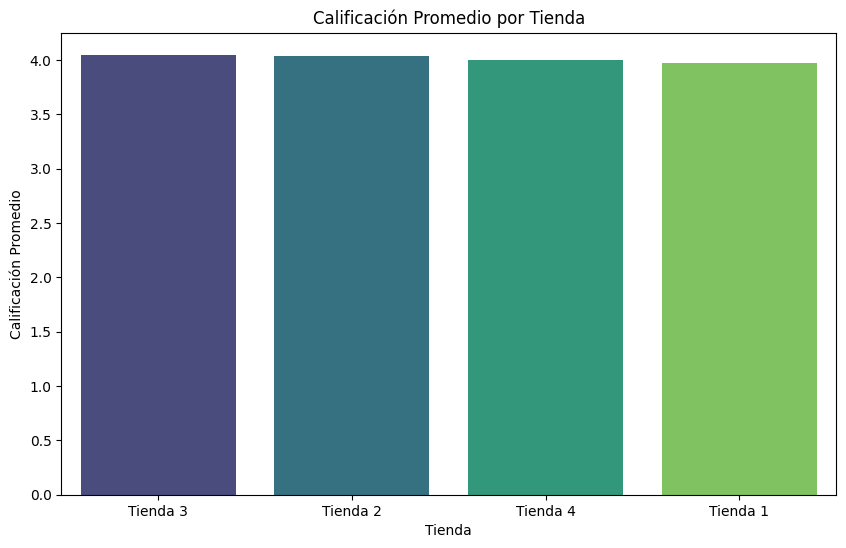

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, palette='viridis', hue=calificacion_promedio.index)

# Añadir título y etiquetas
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

# Mostrar gráfico
plt.show()


Con los datos obtenidos, podemos ver que todas las tiendas tienen una calificación de 4, lo que indica que los clientes están igualmente satisfechos con las cuatro tiendas en general. Este resultado sugiere que, en términos de calificación, no hay diferencias entre las tiendas.

# 4. Productos más y menos vendidos

In [ ]:
# Productos más vendidos
productos_mas_vendidos = df.groupby(['tienda', 'Producto'])['Cantidad de cuotas'].sum().groupby('tienda').idxmax()
print("\nProductos más vendidos por tienda:\n")
for tienda, producto in productos_mas_vendidos.items():
    print(f"{tienda}              {producto}")

# Productos menos vendidos
productos_menos_vendidos = df.groupby(['tienda', 'Producto'])['Cantidad de cuotas'].sum().groupby('tienda').idxmin()
print("\nProductos menos vendidos por tienda:\n")
for tienda, producto in productos_menos_vendidos.items():
    print(f"{tienda}             {producto}")



Productos más vendidos por tienda:

Tienda 1              ('Tienda 1', 'Secadora de ropa')
Tienda 2              ('Tienda 2', 'Iniciando en programación')
Tienda 3              ('Tienda 3', 'Bicicleta')
Tienda 4              ('Tienda 4', 'Dashboards con Power BI')

Productos menos vendidos por tienda:

Tienda 1             ('Tienda 1', 'Celular ABXY')
Tienda 2             ('Tienda 2', 'Mesa de comedor')
Tienda 3             ('Tienda 3', 'TV LED UHD 4K')
Tienda 4             ('Tienda 4', 'Armario')


Con esto podemos ver los productos mas y menos vendidos de cada tienda

# 5. Envío promedio por tienda

In [ ]:
# Paso 1: Calcular el costo de envío promedio por tienda
envio_promedio = df.groupby('tienda')['Costo de envío'].mean()

# Mostrar el envío promedio por tienda
print(envio_promedio)


tienda
Tienda 1   26,019
Tienda 2   25,216
Tienda 3   24,806
Tienda 4   23,459
Name: Costo de envío, dtype: float64


<ipython-input-33-e33a9cc842dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette='viridis')


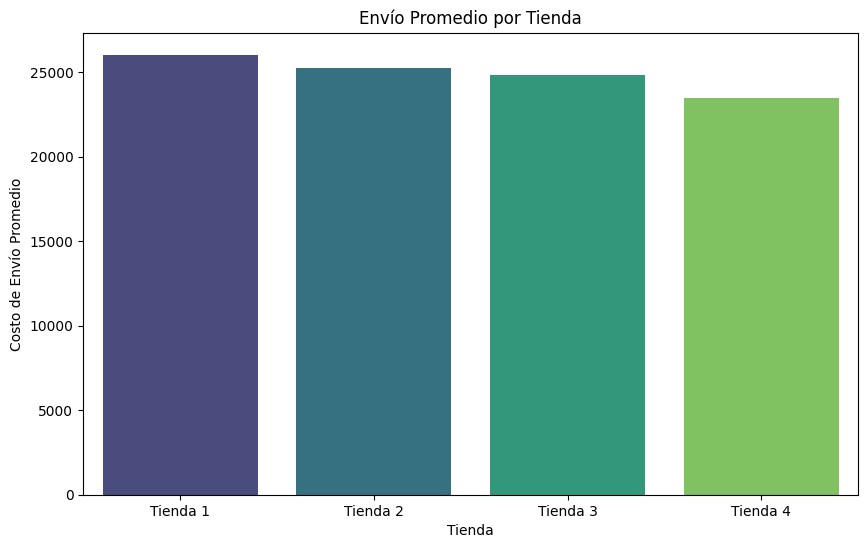

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Gráfico de costo de envío promedio por tienda
plt.figure(figsize=(10,6))
sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette='viridis')
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()


Podemos ver que la tienda 1 tiene el costo de envío más alto, mientras que la tienda 4 ofrece el costo de envío más bajo.

# 6. Conclución

In [35]:
facturacion_total = df.groupby('tienda')['facturacion'].sum().sort_values()


In [36]:
tienda_menor_facturacion = facturacion_total.idxmin()
print(f"La tienda con menor facturación es: {tienda_menor_facturacion}")


La tienda con menor facturación es: Tienda 4


In [38]:
ventas_totales = df.groupby('tienda')['Cantidad de cuotas'].sum().sort_values()
print(ventas_totales)

tienda_menos_ventas = ventas_totales.idxmin()
print(f"La tienda que ha vendido menos productos en total es: {tienda_menos_ventas}")


tienda
Tienda 4    6829
Tienda 2    6847
Tienda 1    6943
Tienda 3    7001
Name: Cantidad de cuotas, dtype: int64
La tienda que ha vendido menos productos en total es: Tienda 4


In [41]:
costo_envio_promedio = df.groupby('tienda')['Costo de envío'].mean()


In [42]:
tienda_mayor_costo_envio = costo_envio_promedio.idxmax()
print(f"La tienda con mayor costo de envío es: {tienda_mayor_costo_envio}")

La tienda con mayor costo de envío es: Tienda 1


Luego de analizar los distintos indicadores de rendimiento de las cuatro tiendas incluyendo facturación, volumen de ventas por categoría, calificación promedio, productos más y menos vendidos, y costo de envío promedio podemos concluir que la Tienda 4 presenta el desempeño más bajo en casi todos los aspectos evaluados. Es la que menos factura, la que menos productos vende y también tiene una baja rotación de stock. Aunque el costo de envío más alto corresponde a la Tienda 1, esta última compensa con un alto nivel de facturación y ventas. Por lo tanto, considerando todos los factores, la Tienda 4 se perfila como la opción menos rentable y sería la candidata más lógica para ser vendida o cerrada.
